In [63]:
import numpy as np
import cv2
import tool_kit_show_img as tools
import os
import matplotlib.pyplot as plt


In [64]:
"""图片路径和模板路径"""
char_img_path = '../divide/test12/test12-0.jpg'
single_templ_path = '../refer/M/demo1001.jpg'
folder_templ_path = '../refer/M/'
templ_path = '../refer/'
templates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
             'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
             'X', 'Y', 'Z']

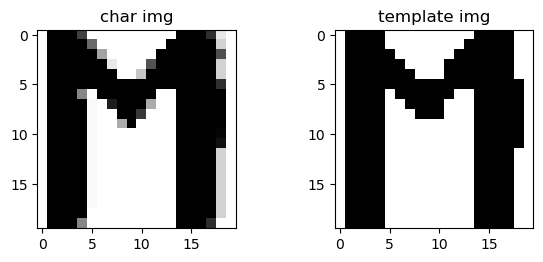

ret = 6228733.5


In [65]:
""" 定义一对一计算匹配度函数 并且测试运行 """


def single2single(img_path, single_template_path):
    """
    这个函数用于匹配一个单一的字符图片和单一的模板图片，并且返回匹配值。
    :param img_path: 字符图片路径
    :param single_template_path: 模板图片路径
    :return value: 匹配值/匹配度
    """
    """ 读取和处理字符图片 """
    img = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8), 1)  # 读取图片
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    """ 读取和处理模板图片 """
    templ = cv2.imdecode(np.fromfile(single_template_path, dtype=np.uint8), 1)
    templ = cv2.GaussianBlur(templ, (3, 3), 0)
    templ = cv2.cvtColor(templ, cv2.COLOR_BGR2GRAY)
    templ = cv2.threshold(templ, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    """ 修改图片大小 """
    height, width = templ.shape[:2]
    img = cv2.resize(img, (width, height))
    """ 测试输出 """
    # 创建一个2x2的子图布局，并在第一个子图上显示第一张图像
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='binary')
    # plt.axis('off')
    plt.title('char img')
    # 在第二个子图上显示第二张图像并设置标题
    plt.subplot(1, 2, 2)
    plt.imshow(templ, cmap='binary')
    plt.title("template img")
    # plt.axis('off')
    # 调整子图之间的间距
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    # cv2.imshow('char img', img)
    # cv2.imshow('template image', templ)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    """ 模板匹配并且返回值 """
    result = cv2.matchTemplate(img, templ, cv2.TM_CCOEFF)[0][0]
    return result


ret = single2single(char_img_path, single_templ_path)
print(f'ret = {ret}')


In [66]:
""" 定义一对多的模板匹配函数 """


def single2batch(char_image_path, folder_template_path):
    """
    一个字符和一组模板匹配，返回最大的匹配值
    :param char_image_path: 字符图片路径
    :param folder_template_path: 模板字符路径
    :return: 返回最大的匹配值
    """
    """ 读取和处理字符图片 """
    img = cv2.imdecode(np.fromfile(char_image_path, dtype=np.uint8), 1)  # 读取图片
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    char_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    """ 通过列表保存全部模板字符图片路径 """
    templ_path_list = list()
    for file_path in os.listdir(folder_template_path):
        templ_path_list.append(folder_templ_path + file_path)
    # print(f'templ_path_list = {templ_path_list}')
    """ 循环遍历模板路径列表，一次进行模板匹配 """
    scores = list()
    for file_path in templ_path_list:
        """ 读取和处理模板图片 """
        templ = cv2.imdecode(np.fromfile(file_path, dtype=np.uint8), 1)
        templ = cv2.GaussianBlur(templ, (3, 3), 0)
        templ = cv2.cvtColor(templ, cv2.COLOR_BGR2GRAY)
        templ = cv2.threshold(templ, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
        """ 修改字符图片的尺寸 """
        height, width = templ.shape
        char_img = cv2.resize(char_img, (width, height))
        """ 模板匹配 """
        result = cv2.matchTemplate(char_img, templ, cv2.TM_CCOEFF)[0][0]
        scores.append(int(result))
        """ 输出测试 
        plt.subplot(1, 2, 1)
        plt.imshow(char_img, cmap='binary')
        plt.title(f'result = {result}')
        plt.subplot(1, 2, 2)
        plt.imshow(templ, cmap='binary')
        plt.title(f'{file_path}')
        plt.subplots_adjust(wspace=0.5)
        plt.show()
        """
    print(f'scores: {scores}')
    print(f'max score: {max(scores)}')


single2batch(char_img_path, folder_templ_path)

scores: [2753714, 3469611, 74149, 1709957, 3923970, 866393, 844261, 2951540, 2495935, 3566229, 3256640, 3816040, -1210204, 4050926, -1127660, 355199, 2069546, 4395290, 1260179, -1085168, 946413, -576198, 3641737, -2230778, -173546, 798841, -906239, 976841, 1208819, -899320, 951200, -213435, -321988, 1394888, 1544546, 578396, 814638, 2142164, -1740054, 390744, 716279, 175842, -862947, 259580, -971286, -542434, 78473, -1368357, -173460, -441941, -441941, -346663, -1062351, -1422221, -1422221, 713640, 739515, 436118, -1826946, -147078, -1440301, 998103, -761706, -1115576, -739770, 998103, 6818, -1226860, 530020, -1362167, -93895, -425950, 766551, 657260, 819214, 2765190, -10335, 585316, -441940, -28967, 2658079, -1564382, -1564382, -221516, 1680139, 2553578, 3055518, 774906, 1459694, 1127864, -383933, -1271585, -1403374, -1203285, 428519, -769713, -944251, 60213, -807003, -157622, 1176703, -1085168, 946413, -289916, -2230778, -1127660, 355199, -906239, 951200, 1208819, 1230021, -284873, 9

In [73]:
""" 第三段测试代码，用来测试一个字符图片和全部模板的匹配度 """


def single2all(char_image_path, template_path):
    """
    一个字符图片匹配全部模板。
    :param char_image_path: 
    :param template_path: 
    :return: 
    """
    """ 读取和处理字符图片 """
    img = cv2.imdecode(np.fromfile(char_image_path, dtype=np.uint8), 1)  # 读取图片
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    char_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    """ 读取全部模板图片路径 """
    templ_list = list()
    for i in range(len(templates)):
        templ_set = tools.read_dir(template_path + templates[i])
        templ_list.append(templ_set)
    # print(templ_list)
    """ 遍历模板，进行模板匹配 """
    best_scores = list()
    for templ_set in templ_list:
        scores = list()
        for single_templ_img_path in templ_set:
            """ 读取和处理模板图片 """
            templ = cv2.imdecode(np.fromfile(single_templ_img_path, dtype=np.uint8), 1)
            templ = cv2.GaussianBlur(templ, (3, 3), 0)
            templ = cv2.cvtColor(templ, cv2.COLOR_BGR2GRAY)
            templ = cv2.threshold(templ, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
            """ 修改字符图片的尺寸 """
            height, width = templ.shape
            char_img = cv2.resize(char_img, (width, height))
            """ 模板匹配 """
            result = cv2.matchTemplate(char_img, templ, cv2.TM_CCOEFF)[0][0]
            scores.append(result)
        print(f'max score: {max(scores)} in {scores}')
        best_scores.append(max(scores))
        print(f'best score: {best_scores}')
        print(f'max of best scores: {max(best_scores)}, and index is {best_scores.index(max(best_scores))}')
        print(f'the char is: {templates[best_scores.index(max(best_scores))]}')


single2all(char_img_path, templ_path)

max score: 2703280.25 in [1416832.9, 1765428.4, 1012538.44, 1822925.4, 1820659.5, -1869827.0, 1916226.2, 1751189.5, 1501690.5, 1802457.0, 1765428.4, 1012538.44, 1822925.4, 1820659.5, -1869827.0, -1869827.0, 1916226.2, 1751189.5, 1501690.5, 1802457.0, 1416832.9, -732641.25, 1534694.5, 1909102.4, 1632110.2, -2024385.8, 952438.75, -732641.25, 1493599.4, 1661407.6, -1503223.1, -1060073.2, 1266962.8, 1697384.5, -1228685.4, 2313869.2, -2226717.8, -2024385.8, 1646292.8, 1658432.6, -1121921.0, 2324060.8, -2208859.0, 1543336.9, -1014591.7, 1411036.2, 252786.6, 1824454.9, -311444.88, 1309427.2, 1830442.9, -887131.6, -1503223.1, 1927424.2, -273166.7, -1060073.2, 1612527.9, 1415841.6, 2270340.8, 1872701.5, 1002027.75, 1710685.2, -926656.9, -1228685.4, 1642299.8, 1593408.1, 1293689.9, 1499753.8, 1080483.6, -2226717.8, 1242135.0, 1895480.4, 1417684.0, -904666.7, 1192398.5, -1121921.0, 536307.44, 1469182.0, 2490741.2, -1812375.1, 1740422.1, 1414147.9, 2154367.5, -2163094.5, -2208859.0, 1396249.2, -14